<h1>Анализ программы лояльности</h1>

<h3>Описание проекта</h3>

Проект заключается в анализе программы лояльности магазина строительных материалов «Строили, строили и наконец построили». В рамках проекта необходимо провести исследовательский анализ данных, проанализировать программу лояльности и сформулировать и проверить статистические гипотезы.

В качестве исходных данных предоставлен датасет, содержащий информацию о покупках в магазине строительных материалов. Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности, которая включает скидки, специальные предложения и подарки.


<h3>Цель исследования</h3>

Провести анализ программы лояльности магазина строительных материалов "Строили, строили и наконец построили" с целью выявления эффективности данной программы. Результаты проекта помогут менеджеру проекта принять решение о дальнейшей реализации программы лояльности и выборе стратегии для увеличения лояльности клиентов.

Исследование будет основано на датасетах retail_dataset.csv и product_codes.csv в период за 1 декабря 2016 - 28 февраля 2017

<h3>Ход исследования</h3>

- Подготовка данных:
    - Импорт необходимых библиотек.
    - Загрузка данных из файла.
    - Проверка наличия пропущенных значений и обработка их, если они есть.
    - Проверка наличия дубликатов и обработка их, если они есть.
    - Приведение типов данных к необходимым форматам.
    - Анализ выбросов и обработка их, если они есть.
- Исследовательский анализ данных:
    - Изучение общей информации о данных.
    - Построение графиков для визуализации распределения данных.
    - Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.
    - Поиск корреляций между переменными, такими как суммарная выручка, количество товаров, цена товаров, дата покупки и участие в программе лояльности.
    - Рассчёт следующих метрик:
        - Количество покупок в месяц
        - Среднее количество товаров в чеке
        - Доля покупателей, участвующих в программе лояльности
        - Средний чек (суммарная выручка / количество покупок)
        
*Основной метрикой, по которой мы будем судить об эффективности программы лояльности, будет средний чек участников программы по сравнению с обычными покупателями. Второстепенными метриками будут количество покупок в месяц и среднее количество товаров в чеке. Дополнительные метрики могут включать долю участников программы лояльности, суммарную выручку и т.д.*
- Статистический анализ:
    - Формулирование и проверка статистических гипотез.
    - Проверка гипотезы: средний чек участников программы лояльности выше, чем у остальных покупателей.
    - Формулирование собственной статистической гипотезы.
    - Проверка гипотезы: клиенты, которые участвуют в программе лояльности и делают покупки в магазине чаще, имеют больший размер среднего чека, чем участники программы, которые делают покупки реже.
    - Нулевая гипотеза: средний размер чека участников программы лояльности не зависит от частоты их покупок в магазине.
    - Альтернативная гипотеза: средний размер чека участников программы лояльности зависит от частоты их покупок в магазине.
    - Проверка гипотезы с помощью статистического теста.
- Выводы:
    - Сводка результатов анализа.
    - Рекомендации для улучшения программы лояльности и привлечения новых клиентов.
    - Общие выводы о результатах исследования.

<h3>Оглавление</h3>

1. [Описание данных](#id1)
2. [Открытие данных](#id2)
3. [Предобработка данных](#id3)
    * [Обработка дубликатов](#id4)
    * [Обработка пропущенных значений](#id5)
    * [Обработка аномалий](#id6)
4. [Анализ данных](#id7)
    * [Изучение общей информации о данных](#id8)
    * [Средний чек](#id9)
    * [Количество товаров](#id10)
    * [Количество уникальных товаров](#id11)
    * [Расчёт LTV](#id12)
5. [Статистический анализ](#id13)
    * [Средний чек](#id14)
    * [Количество товаров в чеке](#id15)
6. [Выводы](#id16)

<h3><a id="id1">Описание данных</a> </h3>

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили». Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

<h3><a id="id2">Открытие данных</a> </h3>


In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
 # Загружаем данные
try:
    retail, product = (
        pd.read_csv('/datasets/retail_dataset.csv'),  # покупки
        pd.read_csv('/datasets/product_codes.csv'),  # товары
    )
except:
    retail, product = (
        pd.read_csv('C://work/retail_dataset.csv'),  # покупки
        pd.read_csv('C://work/product_codes.csv'),  # товары
    )

In [3]:
#изучим первые 5 строк
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,"18,427.00",Shop 0,0.00
1,538862,22195,0,2016-12-14 14:11:00,"22,389.00",Shop 0,1.00
2,538855,21239,7,2016-12-14 13:50:00,"22,182.00",Shop 0,1.00
3,543543,22271,0,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
4,543812,79321,0,2017-02-13 14:40:00,"23,151.00",Shop 0,1.00


Названия столбцов необходимо привести к нижнему регистру и "змеиному стилю"

In [4]:
#Получим детальную информацию о колонках DataFrame
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


Всего 105335 записей. У 
- purchase_date (object -> datetime),  
- customer_id (float -> int), 
- loyalty_program (float64 -> int)

некорректный тип данных. 

In [5]:
#изучим первые 5 строк
product.head()

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


Надо исправить название первого столбца на product_id

In [6]:
#Получим детальную информацию о колонках DataFrame
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


С типами данных всё хорошо

<font color='#006957'><b>ВЫВОД</b></font>

В ходе изучения файла retail_dataset.csv:
- изучили общую информацию
- имеются данные о 105335 покупках
- неудобные названия колонок
- У   
    - purchase_date (object -> datetime),  
    - customer_id (float -> int), 
    - shop_id (object -> int), 
    - loyalty_program (float64 -> bool)

    некорректный тип данных. 
    
В ходе изучения файла product_codes.csv:
- изучили общую информацию
- имеются данные о 9969 товарах
- у столбца productID неудобное название

<h3><a id="id3">Предобработка данных</a> </h3>

<h4><a id="id4">Переименование столбцов</a> </h4>

In [7]:
# Меняем названия колонок retail
retail.columns = ['purchase_id','item_id', 'quantity', 'purchase_date', 'customer_id', 'shop_id', 'loyalty_program']
# Меняем названия колонок product
product.rename(columns = {'productID':'product_id'}, inplace = True )

<h4><a id="id5">Обработка дубликатов</a> </h4>

In [8]:
# Подсчитываем количество явных дубликатов в столбцах
retail.duplicated().sum()

1033

In [9]:
# Удаляем явные дубликаты в столбцах 
retail.drop_duplicates()
# Подсчитываем количество явных дубликатов в столбцах
product.duplicated().sum()

0

Поищем неявные дубликаты в таблице product

In [10]:
#отсортируем датафрейм product
product.sort_values('product_id', inplace = True)
product.head()

,product_id,price_per_one
31,10002,0.85
8122,10002,1.63
2459,10002,1.66
9886,10080,0.85
2432,10120,0.21


In [11]:
product[product.duplicated(['product_id'])]

,product_id,price_per_one
8122,10002,1.63
2459,10002,1.66
3542,10125,1.66
6052,10125,0.81
545,10125,0.85
...,...,...
9714,S,5.44
9715,S,7.00
9723,S,55.00
6834,gift_0001_20,16.67


У большинства товаров несколько цен - надо оставить одну. Оставим среднюю стоимость

In [12]:
product = product.groupby('product_id')['price_per_one'].mean().reset_index()
product.head()

,product_id,price_per_one
0,10002,1.38
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


<h4><a id="id6">Обработка пропусков</a> </h4>

In [13]:
#Определяем, в каких столбцах есть пропуски.
retail.isnull().sum()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
shop_id                0
loyalty_program        0
dtype: int64

In [14]:
#Определяем пропуски в столбцах в %
pd.DataFrame(round(retail.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
purchase_id,0.000000
item_id,0.000000
quantity,0.000000
purchase_date,0.000000
customer_id,34.000000
shop_id,0.000000
loyalty_program,0.000000


Пропусков слишком много - 34% - поэтому удалить мы их не можем.

Так как отсутствует именно id покупателя, то скорее всего это не постоянные покупатели, а те кто зашёл в магазин лишь единожды, проверим, являются ли участниками программы лояльности:

In [15]:
len(retail[(retail['customer_id'].isna()) & (retail['loyalty_program']==1)])

0

Все они не участвуют в программе лояльности - присвоим им в качестве customer_id - purchase_id

In [16]:
retail['customer_id'] = retail['customer_id'].fillna(retail['purchase_id'].str.replace('[a-zA-Z]', '', regex=True))

In [17]:
#Определяем, в каких столбцах есть пропуски.
product.isnull().sum()

product_id       0
price_per_one    0
dtype: int64

<h4><a id="id4">Преобразование типов данных</a> </h4>

In [18]:
# преобразование данных о времени
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])

In [19]:
#customer_id меняем тип на int
retail['customer_id'] = retail['customer_id'].astype(int)
#loyalty_program меняем тип на int
retail['loyalty_program'] = retail['loyalty_program'].astype(int)

In [20]:
#посмотрим значения столбца shop_id
retail['shop_id'].unique()

array(['Shop 0', 'Shop 1', 'Shop 4', 'Shop 6', 'Shop 2', 'Shop 11',
       'Shop 3', 'Shop 5', 'Shop 7', 'Shop 12', 'Shop 8', 'Shop 27',
       'Shop 10', 'Shop 20', 'Shop 19', 'Shop 25', 'Shop 14', 'Shop 21',
       'Shop 18', 'Shop 9', 'Shop 16', 'Shop 28', 'Shop 29', 'Shop 17',
       'Shop 22', 'Shop 13', 'Shop 26', 'Shop 24', 'Shop 15', 'Shop 23',
       'Shop 30'], dtype=object)

In [21]:
# для удобства избавимся от Shop, оставим только номер
retail['shop_id'] = retail['shop_id'].str.replace('Shop ', '')

In [22]:
retail['shop_id'].unique()

array(['0', '1', '4', '6', '2', '11', '3', '5', '7', '12', '8', '27',
       '10', '20', '19', '25', '14', '21', '18', '9', '16', '28', '29',
       '17', '22', '13', '26', '24', '15', '23', '30'], dtype=object)

In [23]:
# поменяем тип данных
retail['shop_id'] = retail['shop_id'].astype(int)

<h4><a id="id5">Обработка аномалий</a> </h4>

In [24]:
#Получим статистическую характеристику данных 
retail['quantity'].describe()

count   105,335.00
mean          7.82
std         327.95
min     -74,216.00
25%           0.00
50%           2.00
75%           7.00
max      74,214.00
Name: quantity, dtype: float64

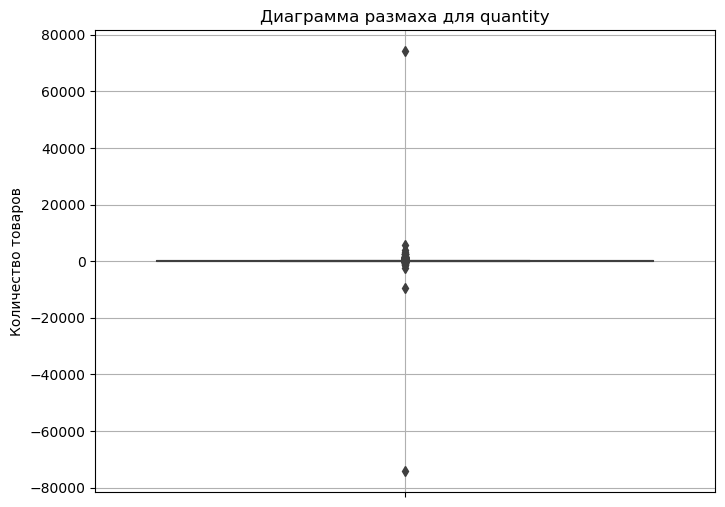

In [25]:
# Построение диаграммы размаха для столбца количества товаров в чеке
plt.figure(figsize=(8, 6))
sns.boxplot(data=retail, y='quantity')
plt.title('Диаграмма размаха для quantity')
plt.ylabel('Количество товаров')
plt.grid(True)
plt.show()

Очень много чеков с отрицательным количеством товаров, давайте посчитаем сколько

In [26]:
#количество строк всего
len(retail[retail['quantity']<1])

35173

In [27]:
#количество строк всего
print('Количество чеков с отрицательным количеством товаров =', len(retail[retail['quantity']<1]))
#% количество строк 
print('% чеков с отрицательным количеством товаров =', round((len(retail[retail['quantity']<1])/len(retail['quantity'])*100),2))

Количество чеков с отрицательным количеством товаров = 35173
% чеков с отрицательным количеством товаров = 33.39


Количество таких чеков достаточно большое - возможно, это возвраты, примем решение удалить такие строки.

In [28]:
retail = retail[retail['quantity']>0]

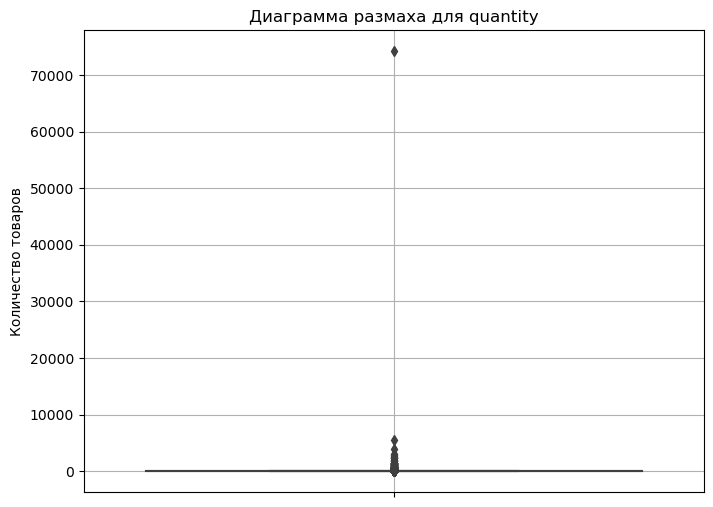

In [29]:
# Построение диаграммы размаха для столбца количества товаров в чеке
plt.figure(figsize=(8, 6))
sns.boxplot(data=retail, y='quantity')
plt.title('Диаграмма размаха для quantity')
plt.ylabel('Количество товаров')
plt.grid(True)
plt.show()

In [30]:
#количество чеков с количеством товаров больше 50 тысяч
len(retail[retail['quantity']>50000])

1

Возможно, это был какой-то крупный заказ, удалим его, чтоб не искажать данные

In [31]:
retail = retail[retail['quantity']<50000]

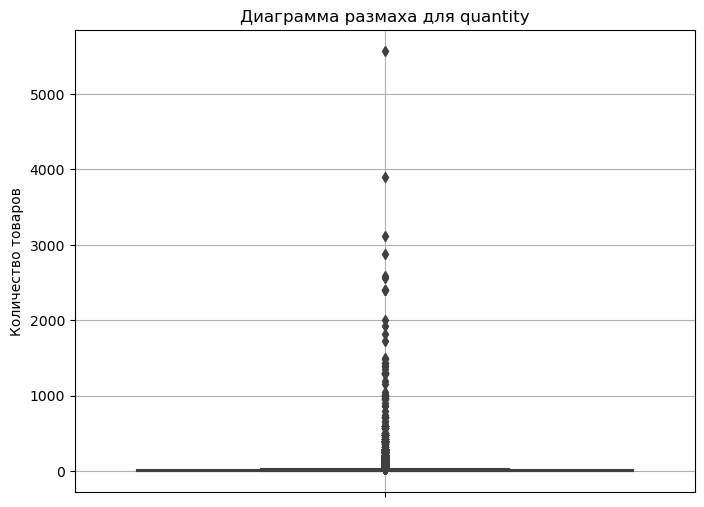

In [32]:
# Построение диаграммы размаха для столбца количества товаров в чеке
plt.figure(figsize=(8, 6))
sns.boxplot(data=retail, y='quantity')
plt.title('Диаграмма размаха для quantity')
plt.ylabel('Количество товаров')
plt.grid(True)
plt.show()

Чуть приблизим график

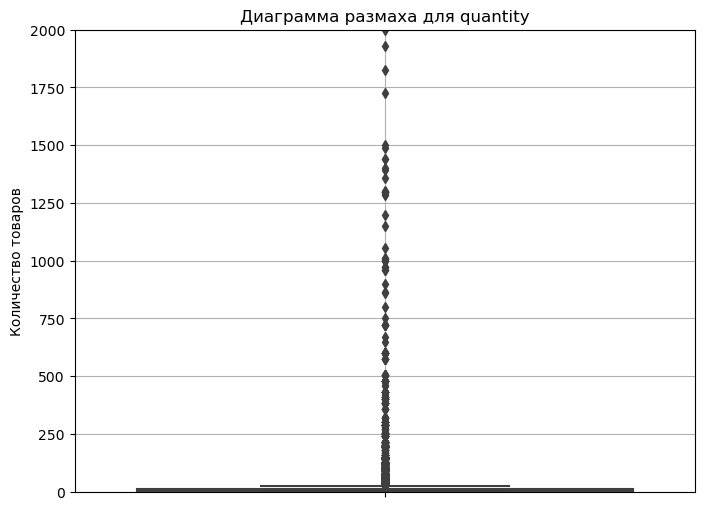

In [33]:
# Построение диаграммы размаха для столбца количества товаров в чеке
plt.figure(figsize=(8, 6))
sns.boxplot(data=retail, y='quantity')
plt.title('Диаграмма размаха для quantity')
plt.ylabel('Количество товаров')
plt.ylim(0, 2000)
plt.grid(True)
plt.show()

In [34]:
# посмотрим, сколько чеков с количеством больше 1600
len(retail[retail['quantity']>1600])

13

удалим такие крупные покупки

In [35]:
retail = retail[retail['quantity']<1600]

In [36]:
# посмотрим характиреистику столбца с ценами
product['price_per_one'].describe()

count   3,159.00
mean        7.70
std       165.33
min         0.00
25%         1.38
50%         2.77
75%         4.99
max     9,268.76
Name: price_per_one, dtype: float64

Что за товары стоимостью 0 рублей? Посмотрим сколько их.

In [37]:
len(product[product['price_per_one']==0])

57

Удалим такие товары.

In [38]:
product = product[product['price_per_one']>0]

<h4><a id="id6">Добавление столбцов</a> </h4>

In [39]:
# Добавляем столбцы с днем, неделей и месяцем
retail['date_day'] = retail['purchase_date'].dt.date
retail['date_week'] = retail['purchase_date'].dt.to_period('1W')
retail['date_month'] = retail['purchase_date'].dt.to_period('M')
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date_day,date_week,date_month
0,538280,21873,11,2016-12-10 12:50:00,18427,0,0,2016-12-10,2016-12-05/2016-12-11,2016-12
2,538855,21239,7,2016-12-14 13:50:00,22182,0,1,2016-12-14,2016-12-12/2016-12-18,2016-12
7,541424,79321,1,2017-01-17 17:57:00,541424,0,0,2017-01-17,2017-01-16/2017-01-22,2017-01
10,537795,82494L,5,2016-12-08 13:03:00,22892,0,1,2016-12-08,2016-12-05/2016-12-11,2016-12
11,541696,22197,4,2017-01-20 18:08:00,541696,0,0,2017-01-20,2017-01-16/2017-01-22,2017-01


In [40]:
# Слияние таблиц retail и product по столбцу item_id
data = pd.merge(retail, product, left_on='item_id', right_on='product_id', how='left')
# Добавление столбца total с суммой чека
data['total'] = data['quantity'] * data['price_per_one']
data = data.drop(['price_per_one', 'product_id'], axis=1)
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,date_day,date_week,date_month,total
0,538280,21873,11,2016-12-10 12:50:00,18427,0,0,2016-12-10,2016-12-05/2016-12-11,2016-12,19.91
1,538855,21239,7,2016-12-14 13:50:00,22182,0,1,2016-12-14,2016-12-12/2016-12-18,2016-12,10.32
2,541424,79321,1,2017-01-17 17:57:00,541424,0,0,2017-01-17,2017-01-16/2017-01-22,2017-01,7.01
3,537795,82494L,5,2016-12-08 13:03:00,22892,0,1,2016-12-08,2016-12-05/2016-12-11,2016-12,25.72
4,541696,22197,4,2017-01-20 18:08:00,541696,0,0,2017-01-20,2017-01-16/2017-01-22,2017-01,4.86


In [41]:
#считаем сумму чека
purchase_totals = data.groupby('purchase_id')['total'].sum()
# Объединение полученных значений с исходным датафреймом по 'purchase_id'
data = data.merge(purchase_totals, on='purchase_id', suffixes=('', '_total'))

In [42]:
# Группировка данных по 'purchase_id' и подсчет уникальных значений 'item_id' и суммы 'quantity' для каждого 'purchase_id'
purchase_items = data.groupby('purchase_id').agg({'item_id': 'nunique', 'quantity': 'sum'}).reset_index()

# Объединение полученных значений с исходным датафреймом по 'purchase_id'
data = data.merge(purchase_items, on='purchase_id', suffixes=('', '_items'))

<font color='#006957'><b>ВЫВОД</b></font>

В ходе предобработки:
- заменили названия столбцов
- поправили типы данных
- избавились от явных дубликатов
- избавились от аномалий в столбце product['price_per_one']
- избавились от аномалий в столбце retail['quantity']
- добавили столбцы с датой 
- добавили столбец с ценой

<h3><a id="id7">Анализ данных</a> </h3>

<h4><a id="id8">Изучение общей информации о данных</a> </h4>

*Посмотрим, сколько всего чеков:*

In [43]:
print('Всего чеков:', data['purchase_id'].nunique())

Всего чеков: 3701


*Посмотрим, сколько всего покупателей в данных:*

In [44]:
print('Всего уникальных покупателей:', data['customer_id'].nunique())

Всего уникальных покупателей: 2046


*Посмотрим, сколько в среднем покупок приходится на покупателя:*

In [45]:
print('В среднем на покупателя приходится {} покупки.'.format(round(data['purchase_id'].nunique()/data['customer_id'].nunique())))

В среднем на покупателя приходится 2 покупки.


*Посмотрим максимальную и минимальную дату:*

In [46]:
print('Минимальная дата:', retail['purchase_date'].min())
print('Максимальная дата:', retail['purchase_date'].max())

Минимальная дата: 2016-12-01 08:26:00
Максимальная дата: 2017-02-28 17:01:00


У нас есть данные с 1 декабря 2016 года по 28 февраля 2017 года. Получается ровно 3 месяца.

*Построим гистограмму по дате и времени.*

In [47]:
daily_purchases = data.groupby(data['purchase_date'])['purchase_id'].nunique()

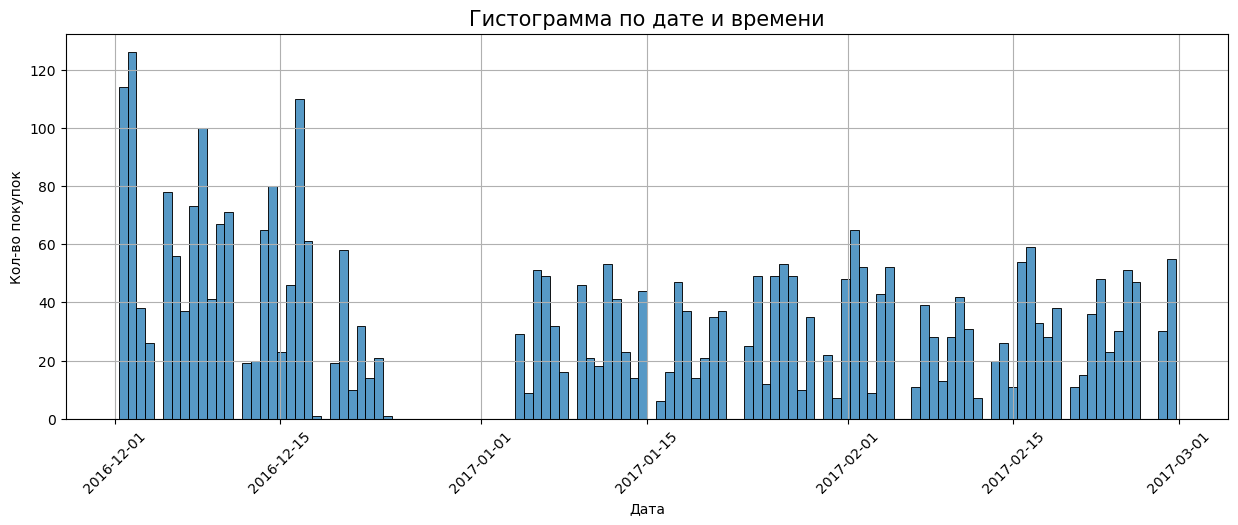

In [48]:
plt.figure(figsize=(15, 5))
sns.histplot(data=daily_purchases , x='purchase_date', bins=120)
plt.title('Гистограмма по дате и времени', fontsize=15)
plt.ylabel('Кол-во покупок')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

По графику видим, что на предпраздничные дни пришлось больше всего покупок. Затем были новогодние каникулы, когда магазин не работал.

**ВЫВОД**

- Определили актуальный период для дальнейшего исследования, за который имеются полные данные: с 1 декабря 2016 года по 28 февраля 2017 года
- Покупок в данных за актуальный период: 3701.
- Уникальных покупателей за актуальный период 2046.
- В среднем на покупателя 2 покупки.

<h4><a id="id9">Средний чек</a> </h4>

In [49]:
#выделим пользователей, участвующих в программе лояльности и нет - в разные датафреймы
loyal_customers = data[data['loyalty_program'] == 1]
non_loyal_customers = data[data['loyalty_program'] == 0]

In [50]:
print('Всего уникальных покупателей-участников программы лояльности:', loyal_customers['customer_id'].nunique())

Всего уникальных покупателей-участников программы лояльности: 560


In [51]:
print('Всего уникальных покупателей-неучастников программы лояльности:', non_loyal_customers['customer_id'].nunique())

Всего уникальных покупателей-неучастников программы лояльности: 1486


Для расчёта среднего воспользуемся медианой - так как она не так подвержена всплескам, которые наверняка были из-за оптовых покупок.

In [52]:
print('Средний чек за все время покупателей-участников программы лояльности:', round(loyal_customers['total_total'].median()))

Средний чек за все время покупателей-участников программы лояльности: 437


In [53]:
print('Средний чек за все время покупателей-неучастников программы лояльности:', round(non_loyal_customers['total_total'].median()))

Средний чек за все время покупателей-неучастников программы лояльности: 704


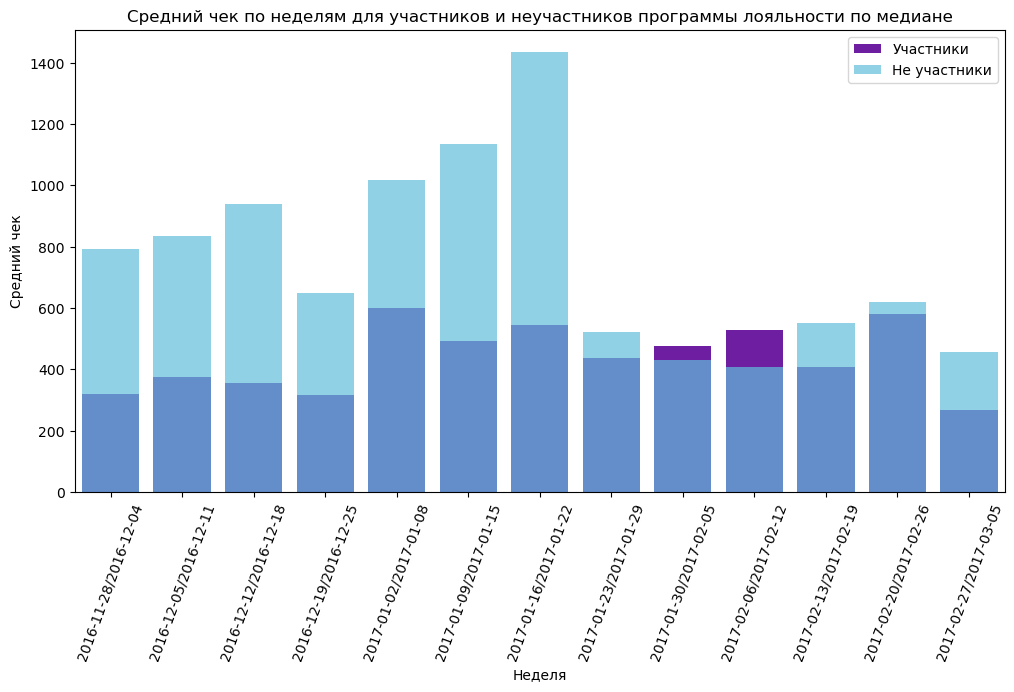

In [55]:
# Рассчитываем средний чек для каждой группы по неделям
loyal_avg_check = loyal_customers.groupby('date_week')['total_total'].median()
non_loyal_avg_check = non_loyal_customers.groupby('date_week')['total_total'].median()

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=loyal_avg_check.index, y=loyal_avg_check.values, color='#7209B7', label='Участники')
sns.barplot(x=non_loyal_avg_check.index, y=non_loyal_avg_check.values, color='#4CC9F0', alpha=0.7, label='Не участники')
plt.xlabel('Неделя')
plt.ylabel('Средний чек')
plt.title('Средний чек по неделям для участников и неучастников программы лояльности по медиане')
plt.legend()
plt.xticks(rotation=70)
plt.grid(False)
plt.show()

In [57]:
non_loyal_customers.groupby('date_week')['total_total'].median()

date_week
2016-11-28/2016-12-04     791.36
2016-12-05/2016-12-11     835.18
2016-12-12/2016-12-18     938.93
2016-12-19/2016-12-25     648.96
2017-01-02/2017-01-08   1,016.93
2017-01-09/2017-01-15   1,133.44
2017-01-16/2017-01-22   1,435.54
2017-01-23/2017-01-29     521.05
2017-01-30/2017-02-05     431.33
2017-02-06/2017-02-12     408.42
2017-02-13/2017-02-19     552.09
2017-02-20/2017-02-26     618.29
2017-02-27/2017-03-05     456.94
Freq: W-SUN, Name: total_total, dtype: float64

In [ ]:
# Рассчитываем средний чек для каждой группы по неделям
loyal_avg_check = loyal_customers.groupby('date_week')['total_total'].median()
non_loyal_avg_check = non_loyal_customers.groupby('date_week')['total_total'].median()

# Создание столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=loyal_avg_check.index, y=loyal_avg_check.values, color='#7209B7', label='Участники')
sns.barplot(x=non_loyal_avg_check.index, y=non_loyal_avg_check.values, color='#4CC9F0', alpha=0.7, label='Не участники')
plt.xlabel('Неделя')
plt.ylabel('Средний чек')
plt.title('Средний чек по неделям для участников и неучастников программы лояльности по медиане')
plt.legend()
plt.xticks(rotation=70)
plt.grid(False)
plt.show()

**ВЫВОД**

Хоть по данным за весь период средний чек у участников программы лояльности сильно ниже, чем у остальных. По данным графикам можем сказать, что средние чеки у участников программы лояльности к концу периода выше.

<h4><a id="id10">Количество товаров</a> </h4>

In [56]:
print('Среднее количество товаров в чеке за все время покупателей-участников программы лояльности:', round(loyal_customers['quantity_items'].median()))

Среднее количество товаров в чеке за все время покупателей-участников программы лояльности: 168


In [57]:
print('Среднее количество товаров в чеке за все время покупателей-участников программы лояльности:', round(non_loyal_customers['quantity_items'].median()))

Среднее количество товаров в чеке за все время покупателей-участников программы лояльности: 281


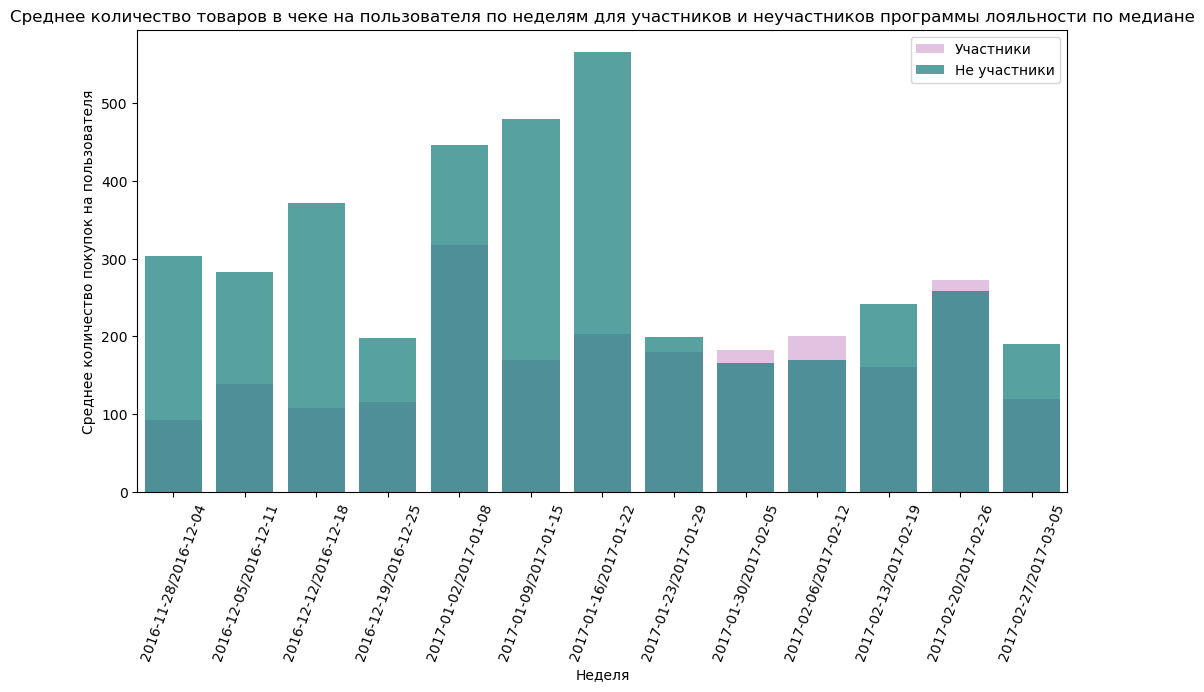

In [58]:
# Рассчитываем среднее количество покупок на пользователя для каждой группы по неделям
loyal_avg_purchases = loyal_customers.groupby('date_week')['quantity_items'].median()
non_loyal_avg_purchases = non_loyal_customers.groupby('date_week')['quantity_items'].median()

plt.figure(figsize=(12, 6))
sns.barplot(x=loyal_avg_purchases.index, y=loyal_avg_purchases.values, color='#DDA0DD', alpha=0.7, label='Участники')
sns.barplot(x=non_loyal_avg_purchases.index, y=non_loyal_avg_purchases.values, color='#008B8B', alpha=0.7, label='Не участники')
plt.xlabel('Неделя')
plt.ylabel('Среднее количество покупок на пользователя')
plt.title('Среднее количество товаров в чеке на пользователя по неделям для участников и неучастников программы лояльности по медиане')
plt.legend()
plt.xticks(rotation=70)

plt.grid(False)
plt.show()

**ВЫВОД**

Здесь также видим, что среднее количество товаров в чеке за все время у неучастников больше, но по графику видим, что к концу периода разница уменьшилась.

<h4><a id="id11">Количество уникальных товаров</a> </h4>

In [59]:
print('Среднее количество уникальных товаров в чеке за все время покупателей-участников программы лояльности:', round(loyal_customers['item_id_items'].median()))

Среднее количество уникальных товаров в чеке за все время покупателей-участников программы лояльности: 23


In [60]:
print('Среднее количество уникальных товаров в чеке за все время покупателей-участников программы лояльности:', round(non_loyal_customers['item_id_items'].median()))

Среднее количество уникальных товаров в чеке за все время покупателей-участников программы лояльности: 34


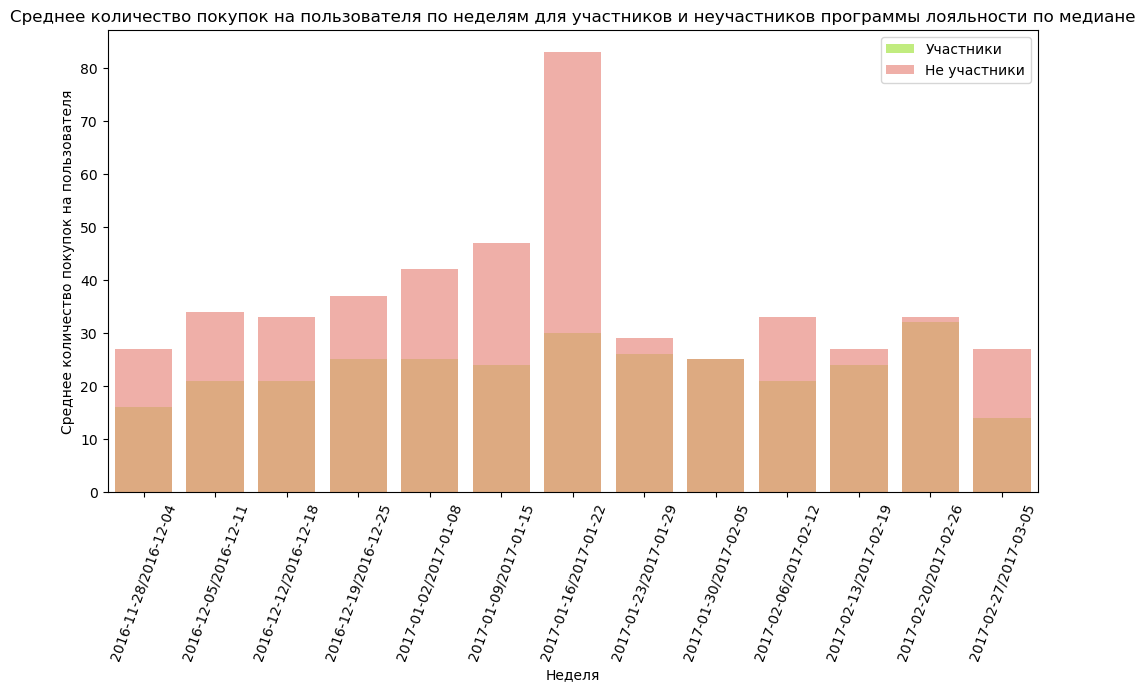

In [61]:
# Рассчитываем среднее количество покупок на пользователя для каждой группы по неделям
loyal_avg_purchases = loyal_customers.groupby('date_week')['item_id_items'].median()
non_loyal_avg_purchases = non_loyal_customers.groupby('date_week')['item_id_items'].median()

plt.figure(figsize=(12, 6))
sns.barplot(x=loyal_avg_purchases.index, y=loyal_avg_purchases.values, color='#ADFF2F', alpha=0.7, label='Участники')
sns.barplot(x=non_loyal_avg_purchases.index, y=non_loyal_avg_purchases.values, color='#FA8072', alpha=0.7, label='Не участники')
plt.xlabel('Неделя')
plt.ylabel('Среднее количество покупок на пользователя')
plt.title('Среднее количество покупок на пользователя по неделям для участников и неучастников программы лояльности по медиане')
plt.legend()
plt.xticks(rotation=70)

plt.grid(False)
plt.show()

**Вывод** 

Здесь опять та же картина. За весь период у неучастников больше, но в конце разница уменьшается.

<h4><a id="id12">Расчёт LTV</a> </h4>

In [62]:
#выделим пользователей, участвующих в программе лояльности и нет - в разные датафреймы
loyal_customers = data[data['loyalty_program'] == 1]
non_loyal_customers = data[data['loyalty_program'] == 0]

In [63]:
# Группировка данных по покупателям и расчет общей суммы покупок
loyal_customers = loyal_customers.groupby('customer_id').agg({'total':'sum',
                                                              'date_month':'nunique'})
# Расчет общей стоимости участия покупателей в программе лояльности
cost_per_month = 200
loyal_customers['total_cost'] = loyal_customers['total'] + loyal_customers['date_month'] * cost_per_month

# Рассчитываем среднюю выручку на клиента в месяц
average_revenue_per_month = loyal_customers['total_cost'].mean()

# Рассчитываем среднюю продолжительность жизни клиента в месяцах
average_lifespan_months = loyal_customers['date_month'].mean()

# Рассчитываем LTV
ltv = average_revenue_per_month * average_lifespan_months

print("LTV участников программы лояльности:", ltv)

LTV участников программы лояльности: 2074.3833455701447


In [64]:
# Группировка данных по покупателям и расчет общей суммы покупок
non_loyal_customers = non_loyal_customers.groupby('customer_id').agg({'total':'sum',
                                                              'date_month':'nunique'})

# Рассчитываем среднюю выручку на клиента в месяц
average_revenue_per_month = non_loyal_customers['total'].mean()

# Рассчитываем среднюю продолжительность жизни клиента в месяцах
average_lifespan_months = non_loyal_customers['date_month'].mean()

# Рассчитываем LTV
ltv = average_revenue_per_month * average_lifespan_months

print("LTV неучастников программы лояльности:", ltv)

LTV неучастников программы лояльности: 1528.3294070658774


**ВЫВОД**

Эти значения представляют собой прогнозную стоимость каждой группы клиентов за время их взаимодействия с компанией. Высокое значение LTV участников программы лояльности может указывать на то, что эти клиенты имеют более высокую степень лояльности и склонны делать повторные покупки, что приводит к более высокой выручке от них. С другой стороны, LTV неучастников программы лояльности ниже, что может свидетельствовать о менее активных и меньше повторяющихся покупках у этой группы клиентов.


<font color='#006957'><b>ВЫВОД</b></font>

В результате проведенного анализа программы лояльности магазина "Строили, строили и наконец построили" были получены следующие выводы:

1. Общая информация:
    - Период, за который имеются полные данные: с 1 декабря 2016 года по 28 февраля 2017 года.
    - Покупок в данных за актуальный период: 3701.
    - Уникальных покупателей за актуальный период 2046 (560 - участников программы лояльности, 1486 - неучастников)
    - Клиенты с картой лояльности совершают покупки чаще и приносят больше выручки.
    
2. Средние значения:

    - За весь исследуемый период средний чек неучастников выше, чем у участников, но по графикам можно заметить, что к к онцу периода эти значения сравниваются, а где-то и выше
    - Тоже самое можно сказать и про среднее количество товаров в чеке и среднее количество уникальных товаров в чеке
    
    
3. LTV:
    - LTV участников программы лояльности составляет 2074.
    - LTV неучастников программы лояльности составляет 1528.

    Программа лояльности имеет положительное влияние на LTV клиентов, так как участники программы лояльности имеют более высокую прогнозную стоимость по сравнению с неучастниками. Рекомендуется продолжать развивать и улучшать программу лояльности для удержания и привлечения новых клиентов и увеличения их LTV.

Исходя из проведенного анализа, можно сказать, что программа лояльности в данном виде пока неэффективна, но имеет потенциал. Клиенты с картами лояльности покупают пока меньше товаров и приносят меньше выручки. Однако, следует учитывать, что данные, на которых основан анализ, представлены за праздничные дни и могут искажать общую картину. Для более точной оценки эффективности программы лояльности рекомендуется провести дополнительные исследования и анализы, включая данные за более продолжительный период времени, вне праздничных дней, чтобы исключить возможные искажения.

<h3><a id="id12">Статистический анализ</a> </h3>


In [65]:
loyalty_program = data.groupby(['loyalty_program', 'customer_id']).agg({'purchase_id': ['nunique'], 'total':['sum'], 'quantity':['sum']}).reset_index()
loyalty_program.columns = ['loyalty_program', 'customer_id', 'purchase_count', 'total_sum', 'quantity_sum']
#средний чек
loyalty_program['avg'] = loyalty_program['total_sum'] / loyalty_program['purchase_count']
#количество товаров
loyalty_program['avg_quanity'] = loyalty_program['quantity_sum'] / loyalty_program['purchase_count']
loyalty_program.head()

,loyalty_program,customer_id,purchase_count,total_sum,quantity_sum,avg,avg_quanity
0,0,18026,2,"1,718.36",574,859.18,287.00
1,0,18027,2,"1,850.37",1832,925.19,916.00
2,0,18029,1,385.26,180,385.26,180.00
3,0,18031,1,370.66,83,370.66,83.00
4,0,18035,1,"3,614.03",1180,"3,614.03","1,180.00"


In [66]:
group_a = loyalty_program[loyalty_program['loyalty_program'] == 0]
group_b = loyalty_program[loyalty_program['loyalty_program'] == 1]

<h4><a id="id13">Средний чек</a> </h4>

Сформулируем гипотезы:

Нулевая гипотеза (H0): 
- Средний чек участников программы лояльности равен среднему чеку остальных покупателей.

Альтернативная гипотеза (H1):
- Средний чек участников программы лояльности отличается от среднего чека остальных покупателей.
- Средний чек участников программы лояльности может быть как выше, так и ниже среднего чека остальных покупателей.

Выберем уровень значимости 0.06, который определяет, насколько сильные должны быть данные, чтобы отвергнуть нулевую гипотезу.

В данном случае в качестве статистического теста подходит t-тест для двух независимых выборок, так как мы сравниваем средние значения двух групп.

In [67]:
# Проведение t-теста для двух независимых выборок
t_statistic, p_value = stats.ttest_ind(group_a['avg'], group_b['avg'])

# Вывод результатов
print('p-значение:', p_value)
if p_value < 0.06:
    print("Отвергаем нулевую гипотезу. Средний чек участников программы лояльности отличен от остальных покупателей.")
else:
    print("Не отвергаем нулевую гипотезу. Средний чек участников программы лояльности не отличается от среднего чека остальных покупателей.")

p-значение: 0.05850557549580523
Отвергаем нулевую гипотезу. Средний чек участников программы лояльности отличен от остальных покупателей.


Посмотрим распределение:
    

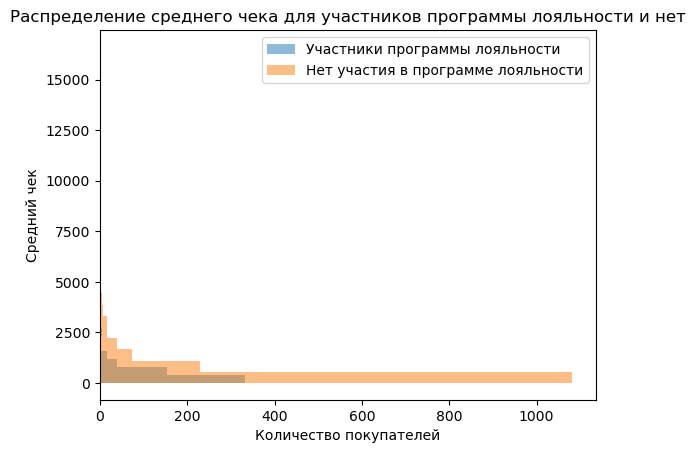

In [68]:
# Разделение данных на участников программы лояльности и остальных покупателей
loyalty_customers = loyalty_program[loyalty_program['loyalty_program'] == 1]
non_loyalty_customers = loyalty_program[loyalty_program['loyalty_program'] == 0]

# Построение графика распределения среднего чека
plt.hist(loyalty_customers['avg'], bins=30, alpha=0.5, label='Участники программы лояльности', orientation='horizontal')
plt.hist(non_loyalty_customers['avg'], bins=30, alpha=0.5, label='Нет участия в программе лояльности', orientation='horizontal')
plt.ylabel('Средний чек')
plt.xlabel('Количество покупателей')
plt.legend()
plt.title('Распределение среднего чека для участников программы лояльности и нет')
plt.show()

При полученном значении p-значения (0.0585), мы можем отвергнуть нулевую гипотезу о равенстве средних чеков участников программы лояльности и остальных покупателей. Это означает, что есть статистически значимое различия в средних чеках между этими двумя группами.

По графику распрделения выборки - мы видим, что средний чек неучастников выше.

<h4><a id="id14">Количество товаров в чеке</a> </h4>

Сформулируем гипотезы:

Нулевая гипотеза (H0): 
- Количество товарок в чеке участников программы лояльности равно количеству товаров в чеке остальных покупателей.

Альтернативная гипотеза (H1): 
- Количество товаров в чеке участников программы лояльности меньше или больше, чем количество товаров в чеке остальных покупателей.

In [69]:
# Проведение t-теста для двух независимых выборок
t_statistic, p_value = stats.ttest_ind(group_a['avg_quanity'], group_b['avg_quanity'])

# Вывод результатов
print('p-значение:', p_value)
if p_value < 0.06:
    print("Отвергаем нулевую гипотезу. Количество покупок участников программы лояльности равно количеству покупок остальных покупателей.")
else:
    print("Не отвергаем нулевую гипотезу. Количество покупок участников программы лояльности меньше, чем количество покупок остальных покупателей.")

p-значение: 0.11053880729205216
Не отвергаем нулевую гипотезу. Количество покупок участников программы лояльности меньше, чем количество покупок остальных покупателей.


Посмотрим распределение:

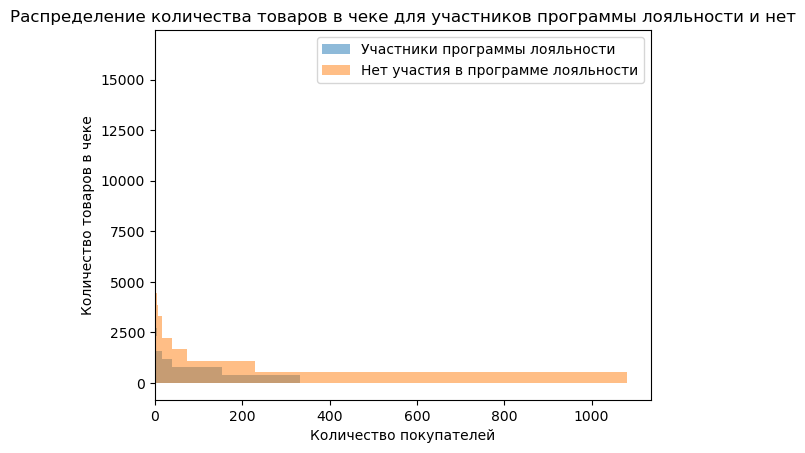

In [70]:
# Построение графика распределения количества товаров в чеке
plt.hist(loyalty_customers['avg'], bins=30, alpha=0.5, label='Участники программы лояльности', orientation='horizontal')
plt.hist(non_loyalty_customers['avg'], bins=30, alpha=0.5, label='Нет участия в программе лояльности', orientation='horizontal')
plt.ylabel('Количество товаров в чеке')
plt.xlabel('Количество покупателей')
plt.legend()
plt.title('Распределение количества товаров в чеке для участников программы лояльности и нет')
plt.show()

<font color='#006957'><b>ВЫВОД</b></font>

Средний чек участников программы лояльности выше, чем остальных покупателей.

Среднее количетво товаров в чеке участников программы лояльности меньше, чем у остальных.

<h3><a id="id15">Вывод</a> </h3>

В ходе проведенного исследования были выполнены следующие действия:

Предобработка данных:

    Названия столбцов были заменены для более понятного обозначения.
    Были скорректированы типы данных в соответствии с содержимым столбцов.
    Исключены явные дубликаты строк.
    Устранены аномалии в столбцах, такие как некорректные значения цен и количества товаров.
    Добавлены столбцы с датами для удобства анализа.
    Был определен актуальный период для дальнейшего исследования, который составляет с 1 декабря 2016 года по 28 февраля 2017 года.
Исследовательский анализ данных:

    - За весь исследуемый период средний чек неучастников выше, чем у участников, но по графикам можно заметить, что к к онцу периода эти значения сравниваются, а где-то и выше
    - Тоже самое можно сказать и про среднее количество товаров в чеке и среднее количество уникальных товаров в чеке

    - LTV участников программы лояльности составляет 2074.
    - LTV неучастников программы лояльности составляет 1528.

    Программа лояльности имеет положительное влияние на LTV клиентов, так как участники программы лояльности имеют более высокую прогнозную стоимость по сравнению с неучастниками. Рекомендуется продолжать развивать и улучшать программу лояльности для удержания и привлечения новых клиентов и увеличения их LTV.


Статистический анализ данных:

    Было подтверждено, что различия в среднем чеке являются статистически значимыми, что позволяет предполагать, что существуют отличия между клиентами с картой лояльности и без нее.

На основе проведенного анализа можно сделать следующие выводы:

    Программа лояльности в данном виде пока не показывает хорошие результаты. Клиенты, участвующие в программе, не имеют более высокий средний чек и не приносят больше выручки по сравнению с остальными покупателями, но к концу периода разрыв между ними сильно сократился, а где-то и ушел в плюс. Также необходимо учитывать, что анализ проводился на ограниченный период и данные могут быть искажены из-за праздничных дней. Для получения более точной картины следует проанализировать данные за более продолжительный период времени.

Рекомендации:

    Расширить программу лояльности на все магазины сети. Это позволит привлечь больше клиентов и увеличить активность покупателей.
    Провести маркетинговую кампанию для привлечения новых участников программы лояльности. Это может включать рекламные акции, предложения и скидки, чтобы привлечь внимание потенциальных клиентов.
    Анализировать данные за более длительный период времени. Это позволит получить более полную картину о долгосрочных тенденциях и эффективности программы лояльности.
    Исследовать влияние программы лояльности на оптовые заказы. Разработать специальные предложения и условия для оптовых клиентов, чтобы увеличить их заказы и выручку от них.
    Постоянно мониторить и анализировать данные по программе лояльности. Это поможет выявить возможные улучшения и оптимизировать стратегию программы.

Презентация:
https://disk.yandex.ru/i/Llohd5-aae0YUQ

Дашборд: https://public.tableau.com/app/profile/galina.baltaeva/viz/retail_16848568983200/Dashboard1